<a href="https://colab.research.google.com/github/Tommy-D0/Metaverse-Financial-Transactions/blob/master/Metaverse_Finanacial_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT: Metaverse Financial Transactions

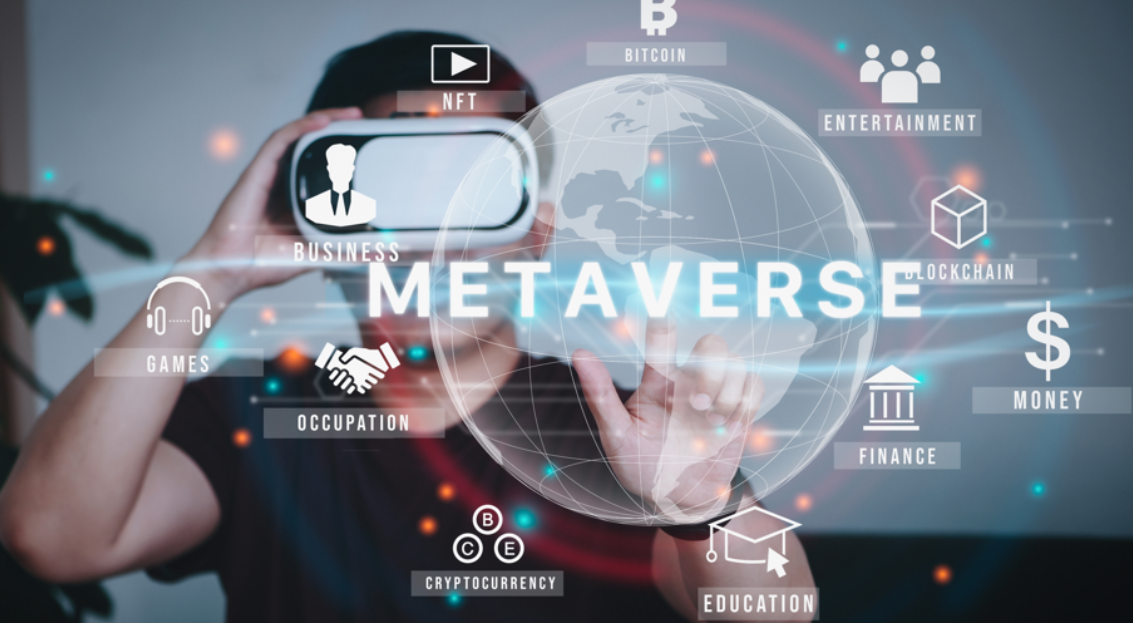

# Introduction

This dataset provides blockchain financial transactions within the Open Metaverse, designed for the development and testing of advanced analytics in fraud detection, risk assessment, and user behavior analysis. It encompasses 78,600 transactions across a diverse set of parameters, including transaction types, amounts, user activity profiles, and risk scores. Each record features detailed attributes such as timestamps, sending and receiving addresses, transaction categories, geographical regions, IP prefixes, and calculated risk levels, providing a comprehensive foundation for research and development in blockchain technologies and security within virtual environments.


## Overview data sources and variable defination

Let's review some of the features that are available in the Metaverse Financial transaction Dataset:
- **Timestamp**: Date and time of the transaction.

- **Hour of Day**: Hour part of the transaction timestamp. (Hours - Hour transaction occurred)

- **Sending Address**: Blockchain address of the sender.

- **Receiving Address**: Blockchain address of the receiver.

- **Amount**: Transaction amount in a simulated currency.

- **Fraud**: Transaction classification including signs of Scam and fraud will be denoted as (1) and transfer, buying, selling be denoted as (0)

- **Location Region**: Simulated geographical region of the transaction.

- **IP Prefix**: Simulated IP address prefix for the transaction.

- **Login Frequency**: Frequency of login sessions by the user, varying by age group.

- **Session Duration**: Duration of activity sessions in **hour**. (Time spent in session)

- **Purchase Pattern**: Behavioral pattern of purchases (e.g., focused, random, high-value).

- **Age Group**: Categorization of users into new, established, and veteran based on their activity history.

- **Risk Score**: Calculated risk score based on transaction characteristics and user behavior.

- **Anomaly**: : Risk level assessment (e.g., high_risk, moderate_risk, low_risk).



**The specific dataset resources:**
[Metaverse Datasets](https://www.kaggle.com/datasets/faizaniftikharjanjua/metaverse-financial-transactions-dataset)





## **Usage**

This dataset is used for 3 main reasons including:

*   Anomaly detection and fraud analysis in blockchain transactions.
*   Behavioral modeling and predictive analytics in virtual economies.
*   Development and testing of algorithms for risk assessment and user verification.





# I. Preparation & Cleaning Data

#### 1/ Import relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files

warnings.filterwarnings("ignore")

In [2]:
# Import datasets:

link = 'https://raw.githubusercontent.com/Tommy-D0/Metaverse-Financial-Transactions/master/metaverse_transactions_dataset.csv'
df = pd.read_csv(link)
df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,4/11/2022 12:47,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,6/14/2022 19:12,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,1/18/2022 16:26,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,6/15/2022 9:20,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2/18/2022 14:35,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


## 2/ Overview of datasets

In [3]:
df.shape

(78600, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [5]:
df.nunique()

timestamp            73110
hour_of_day             24
sending_address       1161
receiving_address     1166
amount               76771
transaction_type         5
location_region          5
ip_prefix                5
login_frequency          8
session_duration       140
purchase_pattern         3
age_group                3
risk_score              31
anomaly                  3
dtype: int64

In [6]:
df["anomaly"].value_counts()

anomaly
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: count, dtype: int64

In [7]:
df["age_group"].value_counts()

age_group
veteran        26422
new            26145
established    26033
Name: count, dtype: int64

In [8]:
df["purchase_pattern"].value_counts()

purchase_pattern
high_value    26422
random        26145
focused       26033
Name: count, dtype: int64

In [9]:
df["transaction_type"].value_counts()

transaction_type
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

In [10]:
df["location_region"].value_counts()

location_region
North America    15840
Europe           15807
Asia             15731
South America    15669
Africa           15553
Name: count, dtype: int64

## 3/ Remove unwanted data

In [11]:
df.drop(["ip_prefix"],  inplace= True, axis = 1)

In [12]:
df.rename(columns= {"hour_of_day": "TX_hour", "sending_address" : "sending", "transaction_type" : "Fraud",
                     "receiving_address" : "receiving", "location_region": "region"}, inplace = True)

In [13]:
df["timestamp"]

0        4/11/2022 12:47
1        6/14/2022 19:12
2        1/18/2022 16:26
3         6/15/2022 9:20
4        2/18/2022 14:35
              ...       
78595    2/13/2022 12:52
78596    2/16/2022 16:15
78597     8/4/2022 16:06
78598     2/26/2022 4:06
78599    6/25/2022 14:27
Name: timestamp, Length: 78600, dtype: object

In [14]:
# Tranform datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

df["Month"] = pd.to_datetime(df["timestamp"]).dt.month
df["Day"] = pd.to_datetime(df["timestamp"]).dt.day

In [15]:
df.head()

,timestamp,TX_hour,sending,receiving,amount,Fraud,region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,Month,Day
0,2022-04-11 12:47:00,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,3,48,focused,established,18.75,low_risk,4,11
1,2022-06-14 19:12:00,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,5,61,focused,established,25.00,low_risk,6,14
2,2022-01-18 16:26:00,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,3,74,focused,established,31.25,low_risk,1,18
3,2022-06-15 09:20:00,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,8,111,high_value,veteran,36.75,low_risk,6,15
4,2022-02-18 14:35:00,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,6,100,high_value,veteran,62.50,moderate_risk,2,18


In [16]:
df['timestamp'].sort_values(ascending= False) # 1 year 2022 from 1 to 12

52891   2022-12-31 23:47:00
62686   2022-12-31 23:46:00
40329   2022-12-31 23:41:00
34614   2022-12-31 23:36:00
28762   2022-12-31 23:25:00
                ...        
3359    2022-01-01 00:36:00
18364   2022-01-01 00:27:00
31457   2022-01-01 00:14:00
41882   2022-01-01 00:12:00
62869   2022-01-01 00:00:00
Name: timestamp, Length: 78600, dtype: datetime64[ns]

In [17]:
# Convert minutes into hour
df['session_duration']= df['session_duration'] / 60

In [18]:
df.head()

,timestamp,TX_hour,sending,receiving,amount,Fraud,region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,Month,Day
0,2022-04-11 12:47:00,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,3,0.800000,focused,established,18.75,low_risk,4,11
1,2022-06-14 19:12:00,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,5,1.016667,focused,established,25.00,low_risk,6,14
2,2022-01-18 16:26:00,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,3,1.233333,focused,established,31.25,low_risk,1,18
3,2022-06-15 09:20:00,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,8,1.850000,high_value,veteran,36.75,low_risk,6,15
4,2022-02-18 14:35:00,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,6,1.666667,high_value,veteran,62.50,moderate_risk,2,18


In [19]:
df["Fraud"].value_counts()

Fraud
sale        25040
purchase    24940
transfer    22125
scam         3949
phishing     2546
Name: count, dtype: int64

In [20]:
# Combine scam and phishing is Fraud (1) and the remaining cases are no Fraud (0)
def convert_transaction_type(transaction_type):
    if transaction_type in ["scam", "phishing"]:
        return 1
    else:
        return 0

df['Fraud'] = df['Fraud'].apply(convert_transaction_type)

In [21]:
df["Fraud"].value_counts()

Fraud
0    72105
1     6495
Name: count, dtype: int64

## 4/ Deal with missing and duplication values

In [22]:
df.duplicated().sum()

0

In [23]:
df.isna().sum()

timestamp           0
TX_hour             0
sending             0
receiving           0
amount              0
Fraud               0
region              0
login_frequency     0
session_duration    0
purchase_pattern    0
age_group           0
risk_score          0
anomaly             0
Month               0
Day                 0
dtype: int64

Using `df.describe()` will give you the statistical information of all continuous variables in the dataset

In [24]:
df.describe()

,timestamp,TX_hour,amount,Fraud,login_frequency,session_duration,risk_score,Month,Day
count,78600,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,2022-07-02 15:41:48.703053568,11.532634,502.574903,0.082634,4.178702,1.161410,44.956722,6.530153,15.747303
min,2022-01-01 00:00:00,0.000000,0.010000,0.000000,1.000000,0.333333,15.000000,1.000000,1.000000
25%,2022-04-02 02:37:45,6.000000,331.319966,0.000000,2.000000,0.583333,26.250000,4.000000,8.000000
50%,2022-07-02 17:46:00,12.000000,500.029500,0.000000,4.000000,1.000000,40.000000,7.000000,16.000000
75%,2022-10-02 09:00:00,18.000000,669.528311,0.000000,6.000000,1.666667,52.500000,10.000000,23.000000
max,2022-12-31 23:47:00,23.000000,1557.150905,1.000000,8.000000,2.650000,100.000000,12.000000,31.000000
std,NaN,6.935897,245.898146,0.275329,2.366038,0.675408,21.775365,3.453638,8.820144


## 5/ Outlier


In [25]:
list(df.describe().columns)

['timestamp',
 'TX_hour',
 'amount',
 'Fraud',
 'login_frequency',
 'session_duration',
 'risk_score',
 'Month',
 'Day']

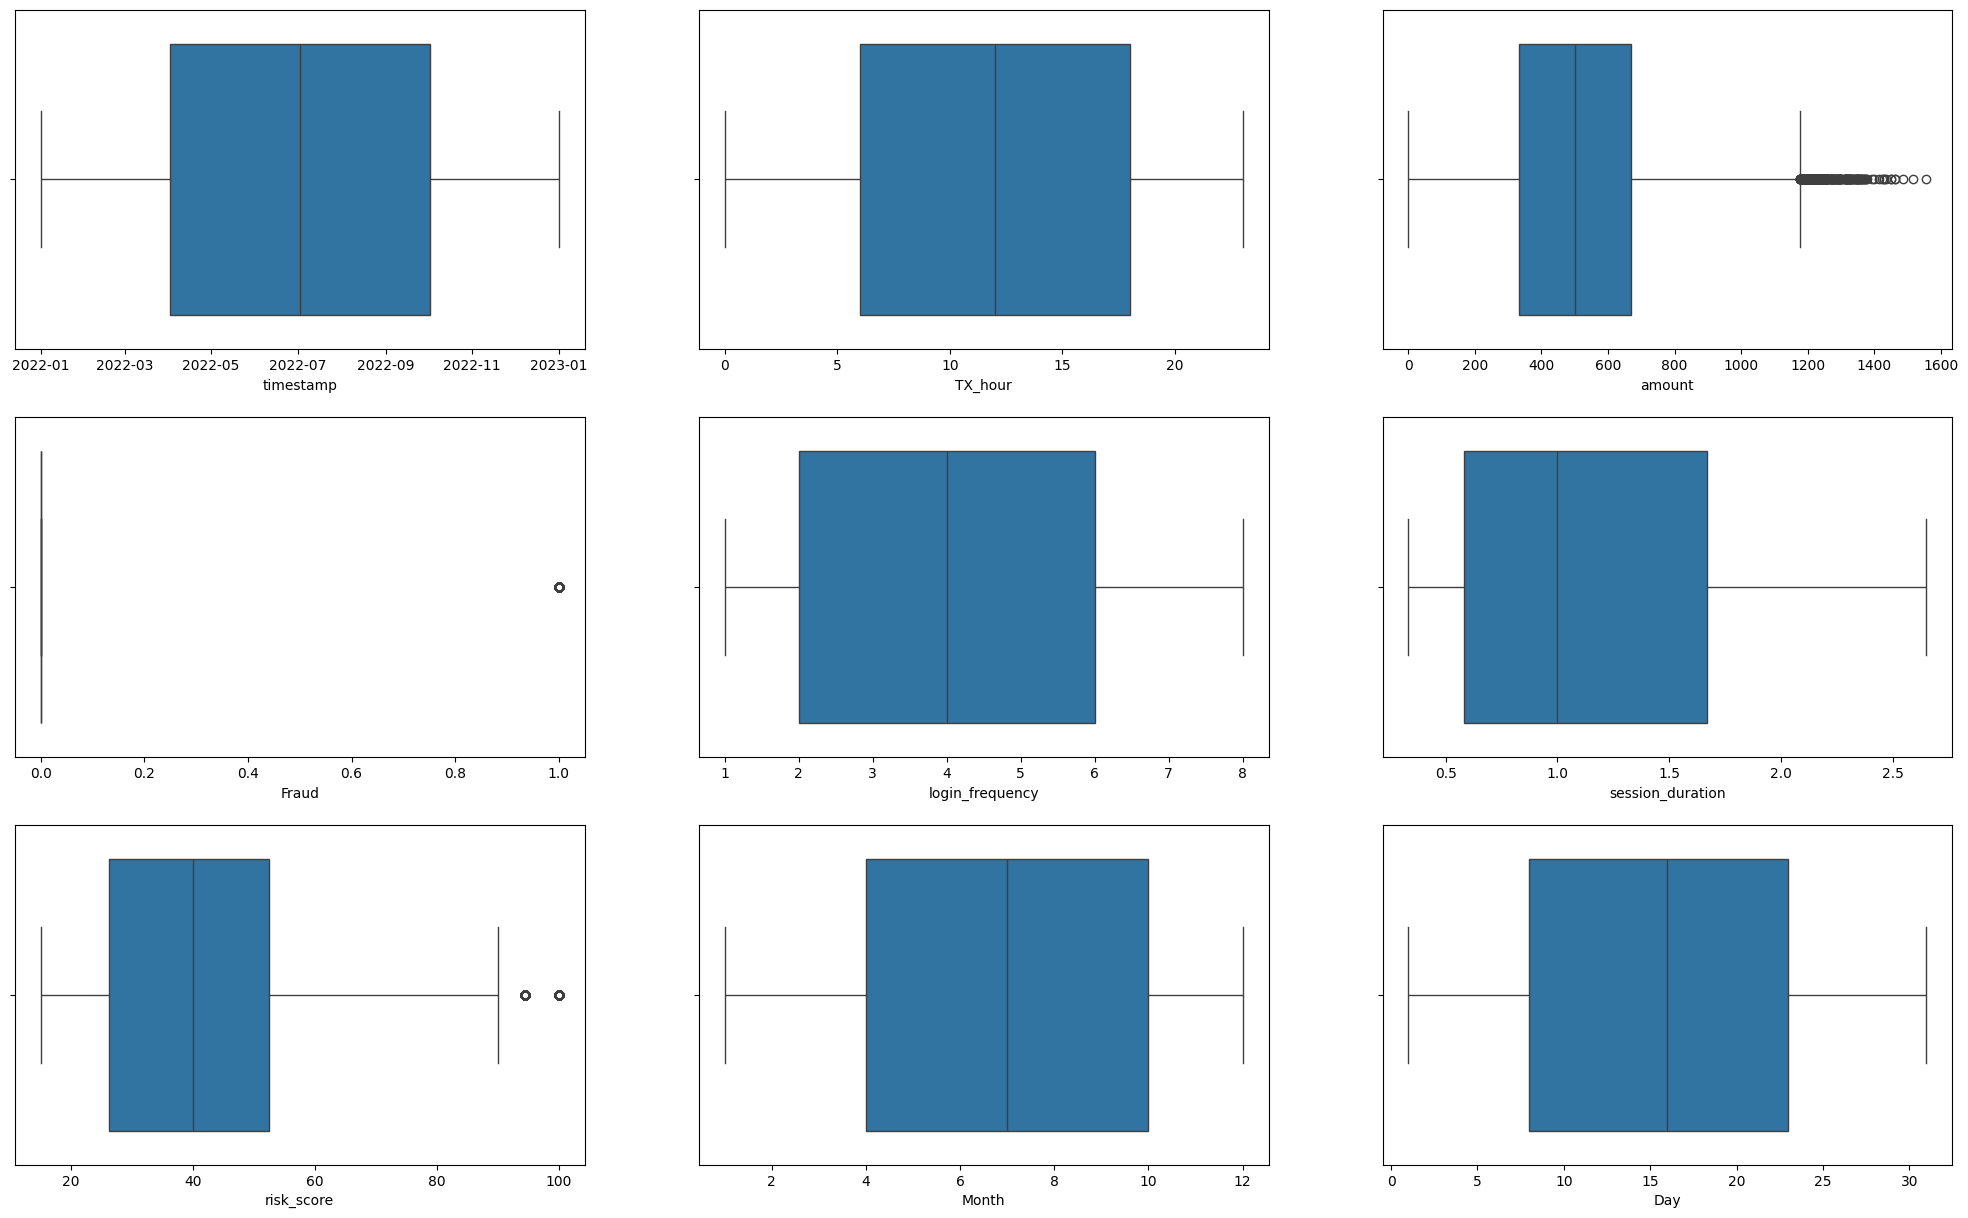

In [26]:
# Histogram can be a good chart to support the above explanation on Box plot
k = list(df.describe().columns)
plt.figure(figsize= (25,15))
for i in k:
  plt.subplot(331+ k.index(i))
  sns.boxplot(df, x= i)

plt.show()

<Axes: >

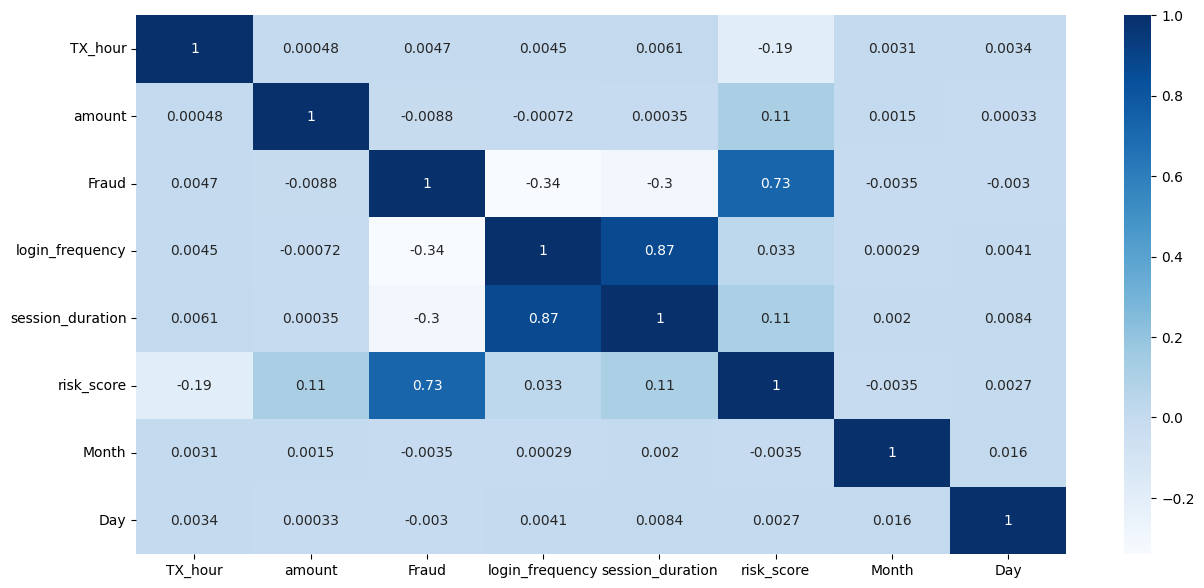

In [27]:
# correlation between features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize= (15,7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# II.  Exploratory Data Analysis





In [28]:
cols=['TX_hour', 'amount', 'Fraud', 'region','login_frequency', 'session_duration', 'purchase_pattern', 'age_group',
       'risk_score', 'anomaly']

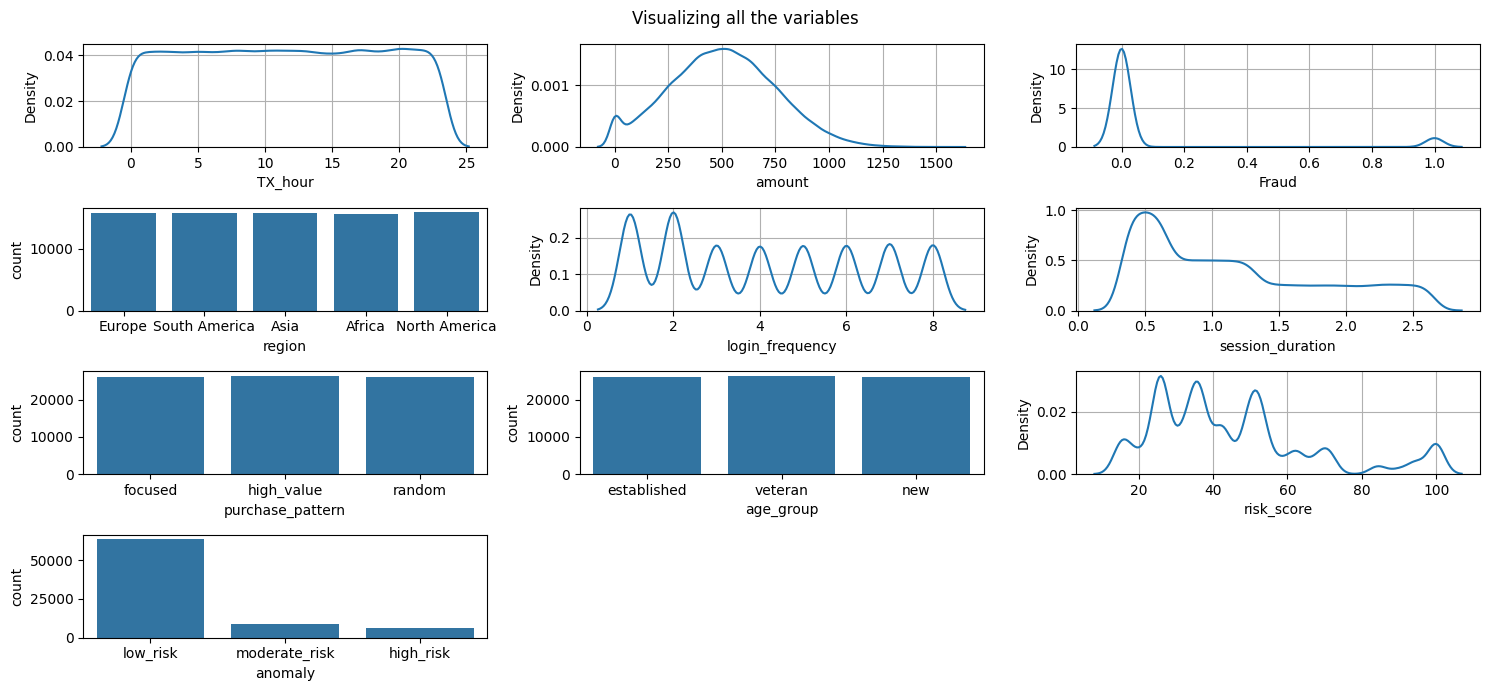

In [29]:
r=4
c=3
it=1

plt.figure(figsize=(15,7))
plt.suptitle("Visualizing all the variables")
for i in cols:
    plt.subplot(r,c,it)
    if df[i].dtype=='object':
        sns.countplot(x=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

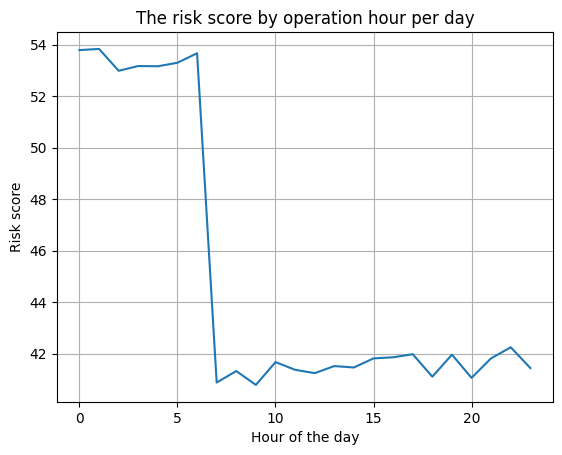

In [30]:
df.groupby('TX_hour')['risk_score'].mean().plot(kind='line')
plt.xlabel('Hour of the day')
plt.ylabel('Risk score')
plt.title("The risk score by operation hour per day")
plt.grid()
plt.show()

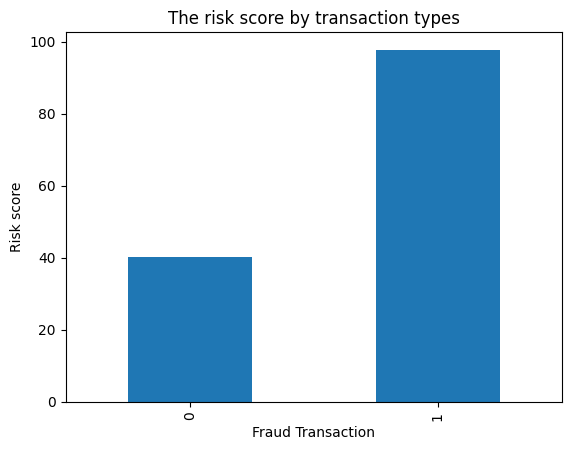

In [31]:
df.groupby('Fraud')['risk_score'].mean().plot(kind='bar')
plt.xlabel('Fraud Transaction')
plt.ylabel('Risk score')
plt.title("The risk score by transaction types")
plt.show()

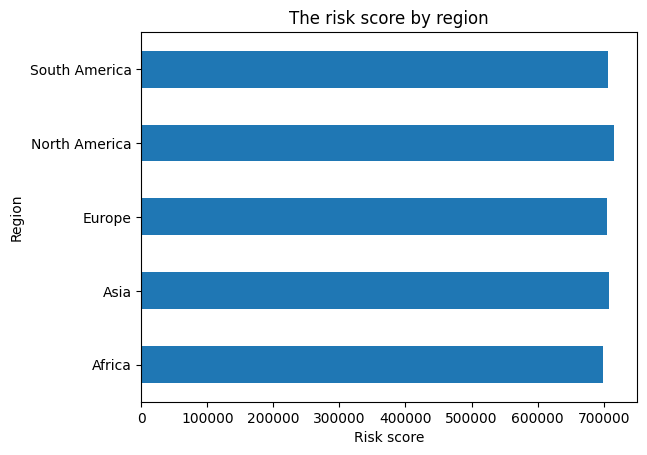

In [32]:
df.groupby('region')['risk_score'].sum().plot(kind='barh')
plt.xlabel('Risk score')
plt.ylabel('Region')
plt.title("The risk score by region")
plt.show()

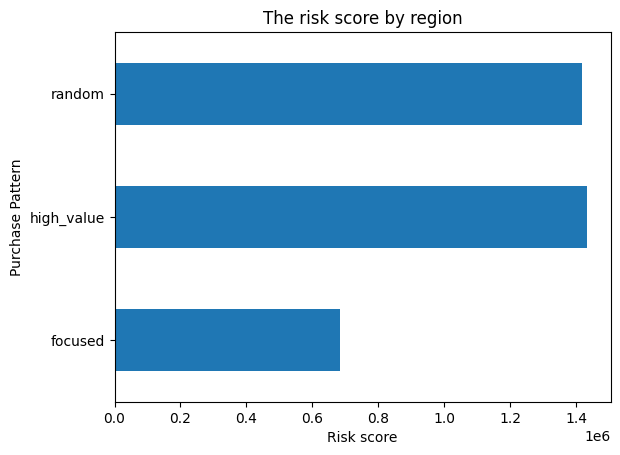

In [33]:
df.groupby('purchase_pattern')['risk_score'].sum().plot(kind='barh')
plt.xlabel('Risk score')
plt.ylabel('Purchase Pattern')
plt.title("The risk score by region")
plt.show()

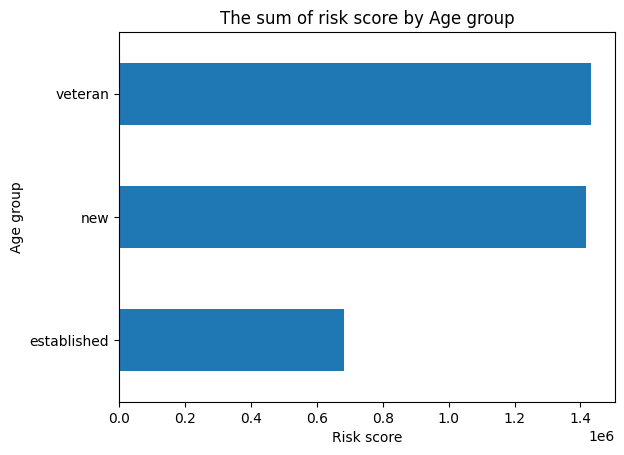

In [34]:
df.groupby('age_group')['risk_score'].sum().plot(kind='barh')
plt.title("The sum of risk score by Age group")
plt.xlabel('Risk score')
plt.ylabel('Age group')
plt.show()

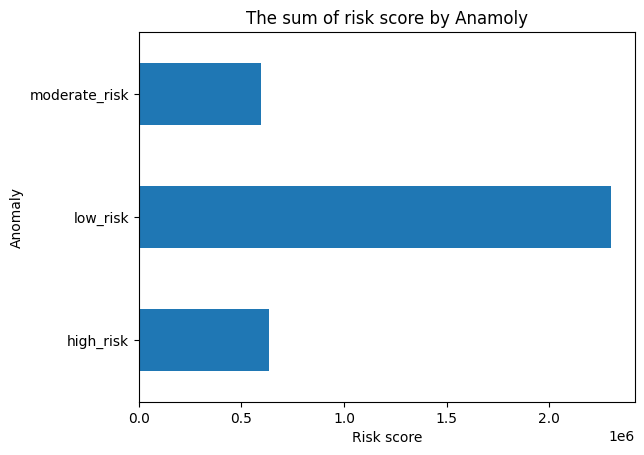

In [35]:
df.groupby('anomaly')['risk_score'].sum().plot(kind='barh')
plt.title("The sum of risk score by Anamoly")
plt.xlabel('Risk score')
plt.ylabel('Anomaly')
plt.show()

# III. Insight Data

## 1/ Fraud Detection

🌺 Note: Gain insight into different points between flagged transactions and no-flag ones.

In [36]:
from plotly import express
# The ratio of Fraud transactions compare with the total transactions
fig = express.pie(df, names='Fraud', color='Fraud',
            title= "The ratio of Fraud transactions compare with the total transactions")

fig.update_layout(width=800, height=600)
fig.show()

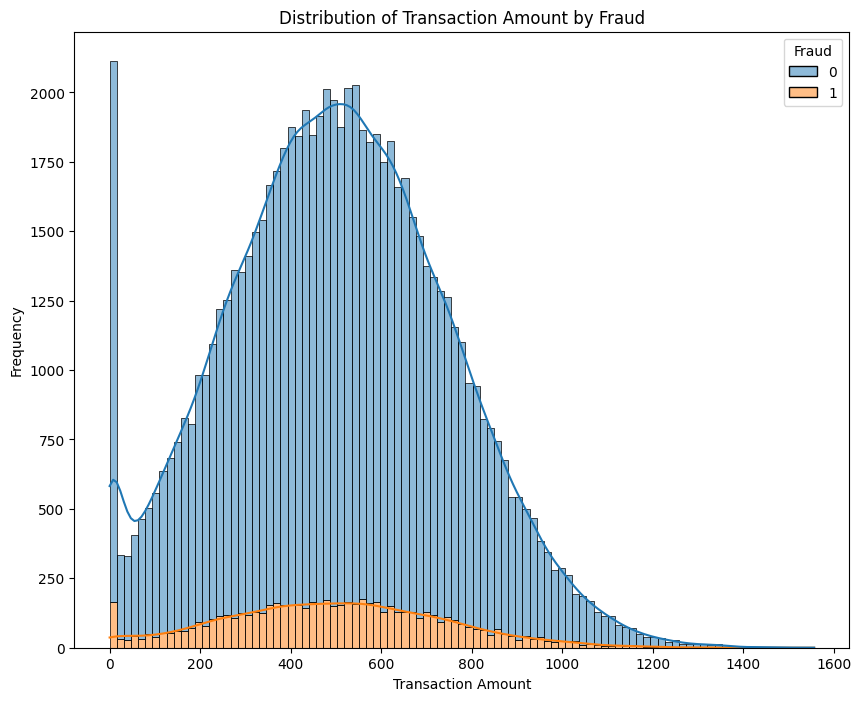

In [37]:
# Distribution anomaly transactions
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='amount', hue='Fraud', multiple='stack', kde=True)
plt.title('Distribution of Transaction Amount by Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

**Transaction Type**: Fraud or No Fraud

In [38]:
df0= df.groupby(["Fraud", "anomaly"]).count()["sending"].reset_index()
df0 = df0.sort_values(by= "anomaly", ascending= False)
df0.head()

,Fraud,anomaly,sending
1,0,moderate_risk,8611
0,0,low_risk,63494
2,1,high_risk,6495


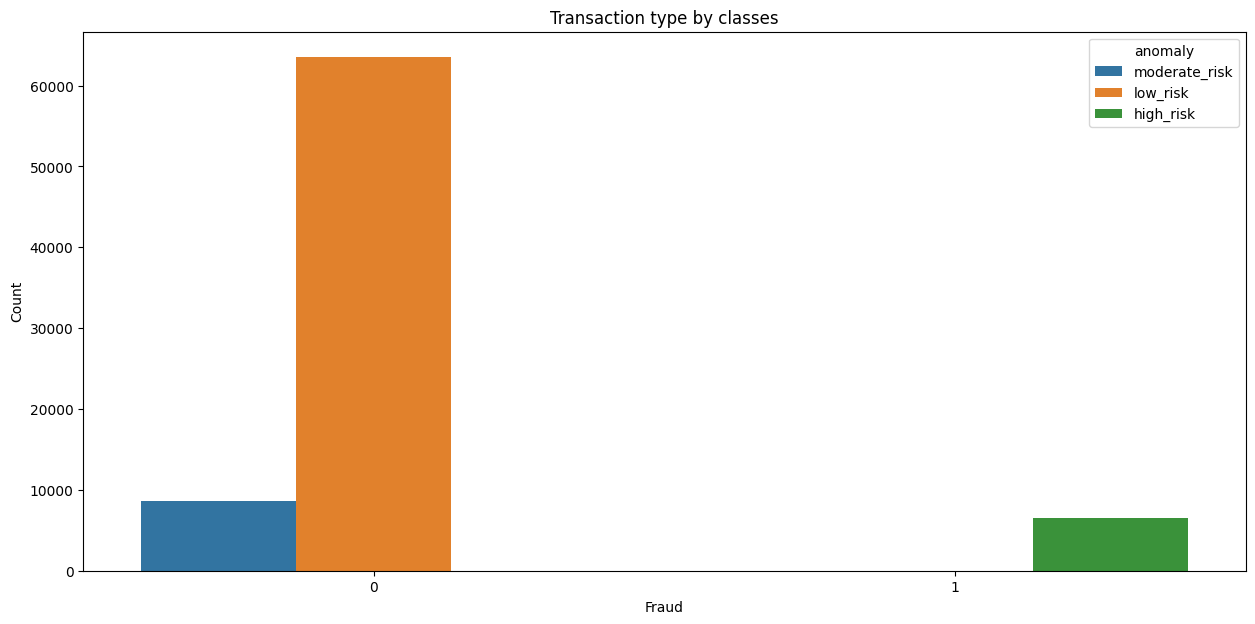

In [39]:
plt.figure(figsize=(15,7))
plt.title("Transaction type by classes")
sns.barplot(df0, x= "Fraud", y= "sending", hue= "anomaly")
plt.ylabel("Count")
plt.show()

**Login Frequency**

In [40]:
df0= df.groupby(["login_frequency", "Fraud"]).count()["sending"].reset_index()
df0 = df0.sort_values(by= "Fraud", ascending= False)
df0.head()

,login_frequency,Fraud,sending
1,1,1,3243
3,2,1,3252
0,1,0,9707
2,2,0,9943
4,3,0,8743


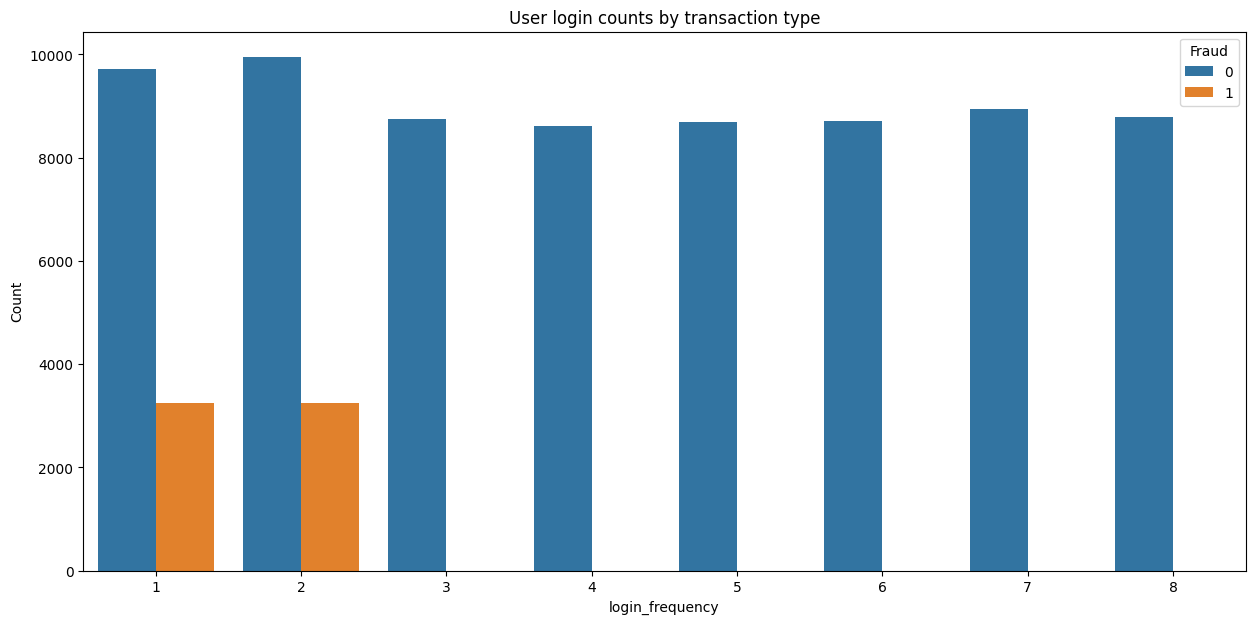

In [41]:
plt.figure(figsize=(15,7))
plt.title("User login counts by transaction type")
sns.barplot(df0, x= "login_frequency", y= "sending", hue= "Fraud")
plt.ylabel("Count")
plt.show()

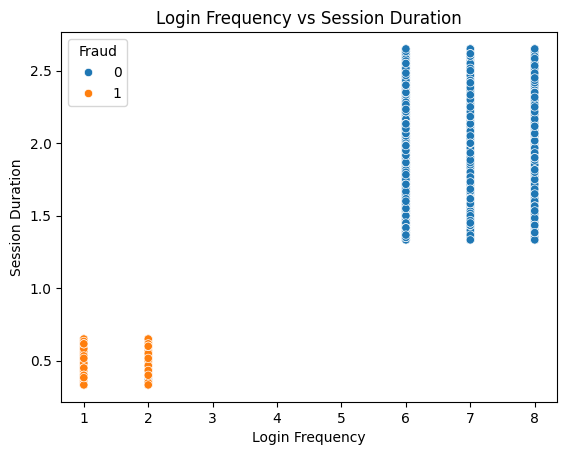

In [42]:
anomaly_filter = df['anomaly'].isin(['moderate_risk', 'high_risk'])
df_filtered = df[anomaly_filter]

sns.scatterplot(x='login_frequency', y='session_duration', data=df_filtered, hue='Fraud')
plt.title('Login Frequency vs Session Duration')
plt.xlabel('Login Frequency')
plt.ylabel('Session Duration')
plt.show()

**Age Group**

In [43]:
df0= df.groupby(["age_group", "Fraud"]).count()["sending"].reset_index()
df0 = df0.sort_values(by= "Fraud", ascending= False)
df0.head()

,age_group,Fraud,sending
2,new,1,6495
0,established,0,26033
1,new,0,19650
3,veteran,0,26422


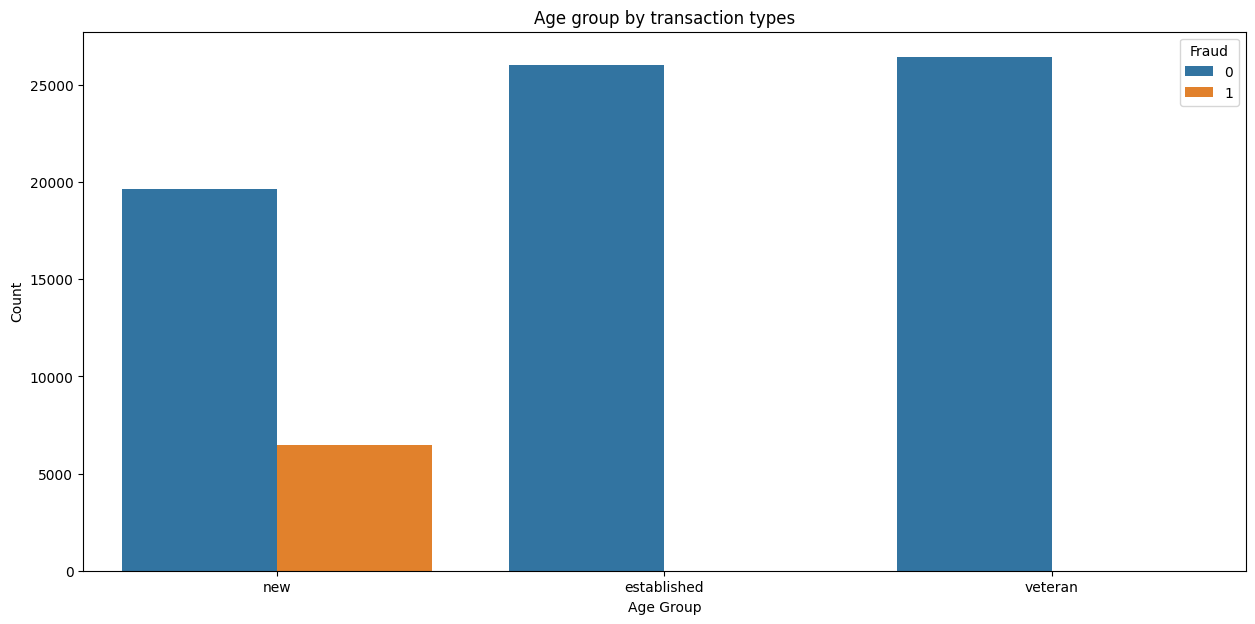

In [44]:
plt.figure(figsize=(15,7))
plt.title("Age group by transaction types")
sns.barplot(df0, x= "age_group", y= "sending", hue= "Fraud")
plt.ylabel("Count")
plt.xlabel("Age Group")
plt.show()

**Transaction hours**

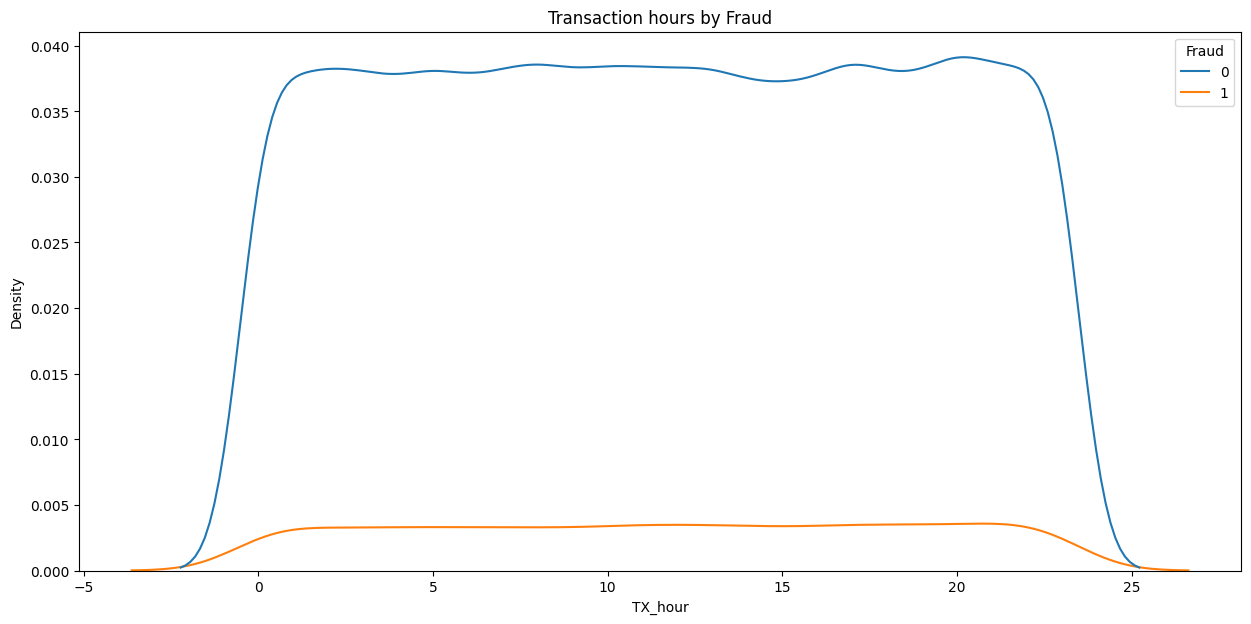

In [45]:
plt.figure(figsize=(15,7))
plt.title("Transaction hours by Fraud")
sns.kdeplot(df,x= "TX_hour", hue= "Fraud")

plt.show()

**Session duration**

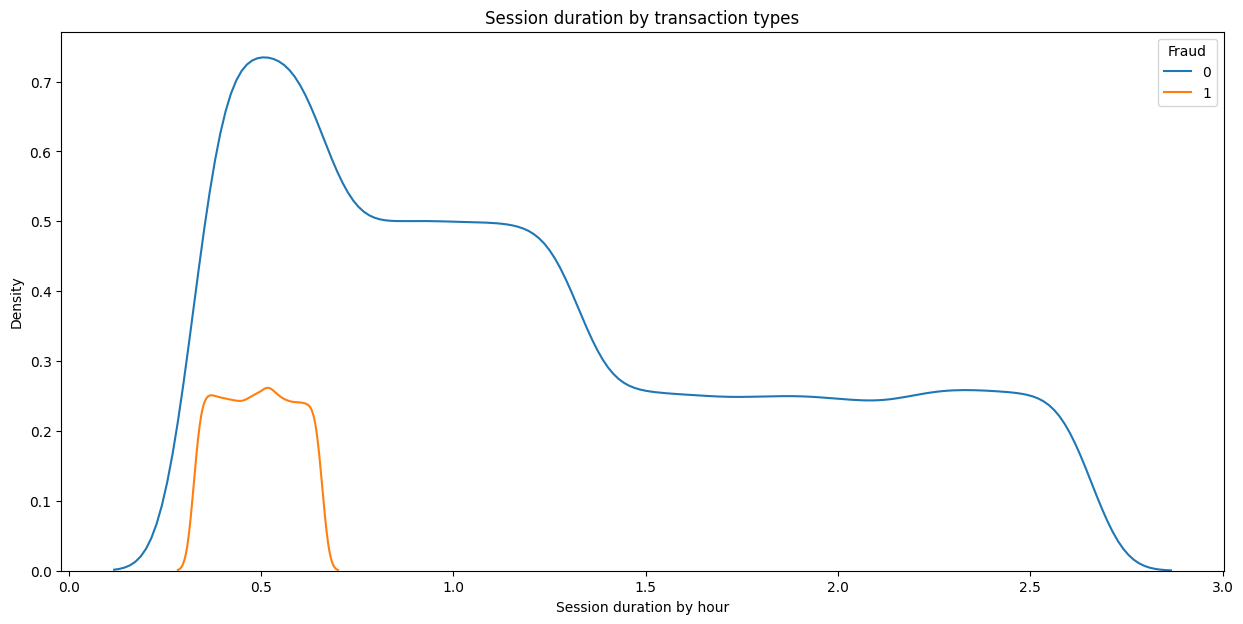

In [46]:
plt.figure(figsize=(15,7))
plt.title("Session duration by transaction types")
sns.kdeplot(df,x= "session_duration", hue= "Fraud")
plt.xlabel("Session duration by hour")
plt.show()

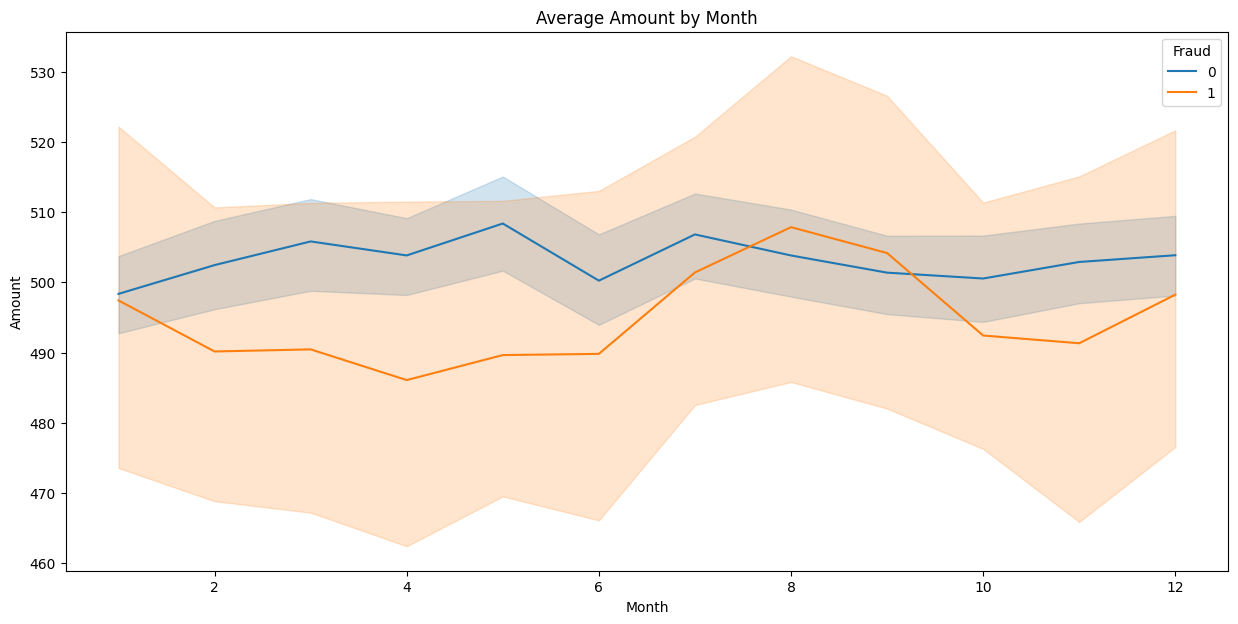

In [47]:
df0 = df.groupby(["Month", "Day", "Fraud"]).mean("amount")

plt.figure(figsize= (15,7))
sns.lineplot(df0, x= "Month", y= "amount", hue= "Fraud")
plt.title("Average Amount by Month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()

## 2/  Address Clustering Fraud Transactions

🤲 Note: Address clustering on a blockchain involves the process of identifying and analyzing the flow of cryptocurrency funds and determining relationships between wallet addresses.

In [48]:
# Most anomaly behaviors focus on situations high risk
df[df["Fraud"] == 1]["anomaly"].value_counts()

anomaly
high_risk    6495
Name: count, dtype: int64

In [49]:
# Input data:
# Gain insight into address relationships  that have Frauded transactions
df_model = df[df["Fraud"] == 1]
k = ["region", "purchase_pattern", "age_group", "anomaly"]

# Tranform categorical into polynominal
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()

# Encode categorical columns
for i in k:
  df_model[i] = ecd.fit_transform(df_model[i])

In [50]:
df_model.shape

(6495, 15)

In [51]:
# df_model.to_csv('df_model.csv')
# files.download('df_model.csv')

🌱 **Model K-Means**

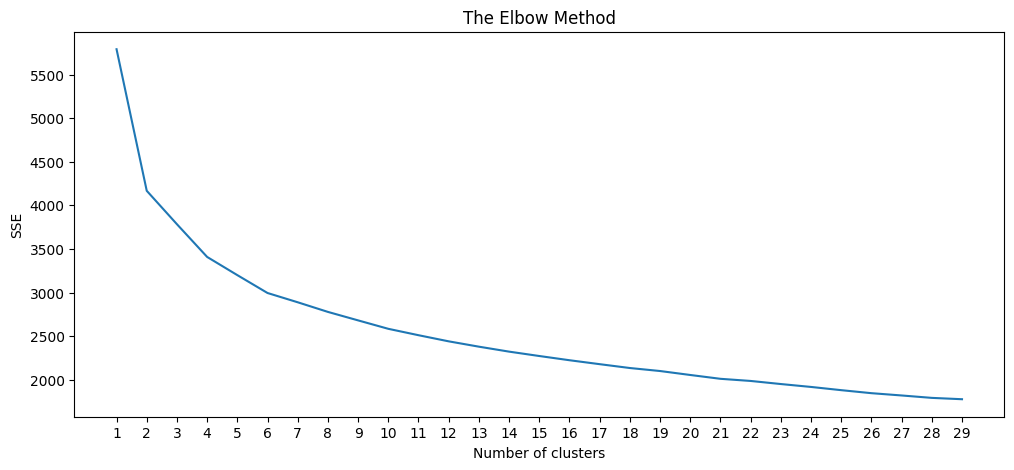

In [52]:
from sklearn.cluster import KMeans

# Input
X = df_model.drop(["timestamp", "anomaly", "sending", "receiving"], axis=1)

# Use Elbow to choose K clusters
k_values = range(1,30)

# Normalize dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

# Methoed K-means:
sse = [(KMeans(n_clusters= k, random_state=42)).fit(X_scale).inertia_ for k in k_values]

# Illustrate graphs number of clusters
plt.figure(figsize=(12,5))
plt.plot(k_values, sse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.xticks(k_values)
plt.show()

In [53]:
# K cluster - 30 Group
kmeans = KMeans(n_clusters = 30, random_state= 42)
clusters = kmeans.fit_predict(X)

df_model["Type"] = clusters
df_model.head()

,timestamp,TX_hour,sending,receiving,amount,Fraud,region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,Month,Day,Type
19,2022-06-07 06:57:00,6,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59,0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82,230.214385,1,2,1,0.416667,0,0,100.0,0,6,7,5
68,2022-11-30 16:32:00,16,0xd03d6a433a903052df6420f3756a79b8cc7aadcd,0x99d8f6c4760a1078c3bceed9e27e397fb488e19a,0.010000,1,2,2,0.516667,0,0,90.0,0,11,30,16
80,2022-08-13 14:03:00,14,0x03ebaf3f967767ea31c49025fd6928619ec43afd,0xc7bdf2bdc064310896794a9cd1db8eef07ffc32e,303.299117,1,4,1,0.433333,0,0,100.0,0,8,13,8
86,2022-01-18 23:54:00,23,0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5,0x4bfe6fa35149db081520aea5e503946572718756,719.112642,1,2,2,0.366667,0,0,100.0,0,1,18,20
92,2022-04-05 23:46:00,23,0xf6511ed068459cab3225fb900437fdfae446e53a,0x113844f9fdd2eb60e8083dec243c1d9522c8af9a,578.199474,1,4,2,0.466667,0,0,94.5,0,4,5,3


In [54]:
# Allocate address clustering more than 30 groups

df_model["Type"].value_counts()

Type
3     349
18    344
14    326
29    308
22    301
6     300
26    284
7     280
25    278
12    276
0     262
28    252
27    246
15    243
20    240
8     238
5     234
1     234
17    211
16    189
11    188
21    172
9     149
24    132
13    128
2     107
23     90
4      78
10     46
19     10
Name: count, dtype: int64

🌍 **DBSCAN**

Text(0, 0.5, 'Percentage of outlier')

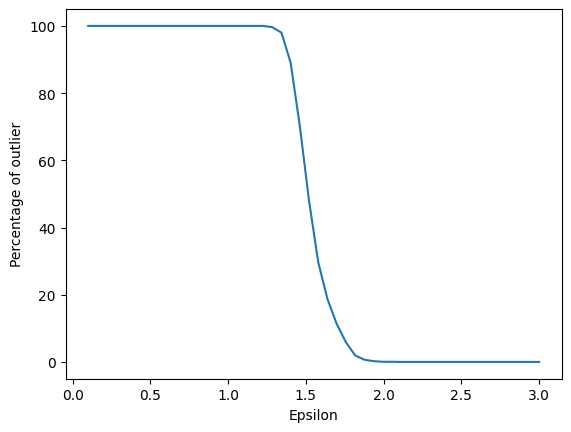

In [55]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

# Input
X = df_model.drop(["timestamp", "anomaly", "sending", "receiving"], axis=1)

# Standardardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

number_of_ouliters = []
percentage_of_outlier = []
min_samples = 2*X.shape[1]

for eps in np.linspace(0.1, 3.0, 50):
  dbscan = DBSCAN(eps= eps, min_samples= min_samples)
  dbscan.fit(X_scaled)

  # Number of clussters
  number_of_ouliters.append(np.sum(dbscan.labels_ == -1))
  # Percentage points classified as outlier
  percentage_of_outlier.append(100*(np.sum(dbscan.labels_ == -1)/len(dbscan.labels_)))

sns.lineplot(x= np.linspace(0.1, 3.0, 50), y= percentage_of_outlier)
plt.xlabel("Epsilon")
plt.ylabel("Percentage of outlier")

In [56]:
# Choose epsilon
best_dbscan = DBSCAN(eps= 2, min_samples= min_samples)
clusters = best_dbscan.fit_predict(X_scaled)

df_model['Cluster'] = clusters

df_model.head()

,timestamp,TX_hour,sending,receiving,amount,Fraud,region,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly,Month,Day,Type,Cluster
19,2022-06-07 06:57:00,6,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59,0x4ec607d0d5683a6e2fa4ca1278205bd81f47ce82,230.214385,1,2,1,0.416667,0,0,100.0,0,6,7,5,0
68,2022-11-30 16:32:00,16,0xd03d6a433a903052df6420f3756a79b8cc7aadcd,0x99d8f6c4760a1078c3bceed9e27e397fb488e19a,0.010000,1,2,2,0.516667,0,0,90.0,0,11,30,16,1
80,2022-08-13 14:03:00,14,0x03ebaf3f967767ea31c49025fd6928619ec43afd,0xc7bdf2bdc064310896794a9cd1db8eef07ffc32e,303.299117,1,4,1,0.433333,0,0,100.0,0,8,13,8,0
86,2022-01-18 23:54:00,23,0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5,0x4bfe6fa35149db081520aea5e503946572718756,719.112642,1,2,2,0.366667,0,0,100.0,0,1,18,20,1
92,2022-04-05 23:46:00,23,0xf6511ed068459cab3225fb900437fdfae446e53a,0x113844f9fdd2eb60e8083dec243c1d9522c8af9a,578.199474,1,4,2,0.466667,0,0,94.5,0,4,5,3,1


In [ ]:
# Allocate address clustering just 2 groups => optimization: group 0 and group 1
# Group -1 are noise points

df_model["Cluster"].value_counts()

Cluster
 1    3251
 0    3241
-1       3
Name: count, dtype: int64

✌ **Visualization by GEPHI**

Note: GEPHI allows for efficient traversal of relationships between addresses, transactions, and other entities, facilitating complex analyses.

<img src='https://github.com/Tommy-D0/Metaverse-Financial-Transactions/blob/master/Gephi_clustering%20address_2.png?raw=true'>

<img src='https://github.com/Tommy-D0/Metaverse-Financial-Transactions/blob/master/Gephi_clustering%20address_1.png?raw=true'>

⛳ **Note**: The DBSCAN optimizes more than K-means about group address clustering, resulting in the choice of the DBSCAN model for clustering group
including **Group 0** and **Group 1**.


In [162]:
# Collect address of sending with Group = 0
df0 = df_model[df_model["Cluster"] == 0]["sending"]

# Collect address of sending with Group = 1
df1 = df_model[df_model["Cluster"] == 1]["sending"]

In [163]:
# Collect address of receiving with Group = 0
df00 = df_model[df_model["Cluster"] == 0]["receiving"]

# Collect address of receiving with Group = 1
df11 = df_model[df_model["Cluster"] == 1]["receiving"]

In [164]:
# Group 0 related addresses together
df0 = pd.concat([df0, df00], axis=0).reset_index(name= "Address").drop(["index"], axis=1)
df0.head()

,Address
0,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59
1,0x03ebaf3f967767ea31c49025fd6928619ec43afd
2,0xdda7960a274187f8aa0ae1737a6aa9342b244f2f
3,0xaaf0e31bb5224b664aa7f16c519824e8ae8295ca
4,0xbe9deb352c06de4d13094d3b005a2f6176e0b4f1


In [165]:
# Group 1 related addresses together
df1 = pd.concat([df1, df11], axis=0).reset_index(name= "Address").drop(["index"], axis=1)
df1.head()

,Address
0,0xd03d6a433a903052df6420f3756a79b8cc7aadcd
1,0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5
2,0xf6511ed068459cab3225fb900437fdfae446e53a
3,0xbaea3ed4a1a9cd58ccce5e0f52c68c852deb5c68
4,0x22ccdd76da6ea44a34cf71d61a6f664a4efb5e60


In [166]:
# Check duplicated address
print(f'number of duplicated address Group 0: {df0.duplicated().sum()}')
print(f'number of duplicated address Group 1: {df1.duplicated().sum()}')

number of duplicated address Group 0: 5212
number of duplicated address Group 1: 5250


In [167]:
# Drop duplicated address
df0.drop_duplicates(inplace= True)
df1.drop_duplicates(inplace= True)

print(f'Check duplicated address Group 0: {df0.duplicated().sum()}')
print(f'Check duplicated address Group 1: {df1.duplicated().sum()}')

Check duplicated address Group 0: 0
Check duplicated address Group 1: 0


In [168]:
print(f'number of the true address Group 0: {df0.shape}')
print(f'number of the true address Group 1: {df1.shape}')

number of the true address Group 0: (1270, 1)
number of the true address Group 1: (1252, 1)


In [169]:
# Address of Group 0
df0.head()

,Address
0,0x913bb81a957aec7d0e46c8dfc46f87cdde2e7b59
1,0x03ebaf3f967767ea31c49025fd6928619ec43afd
2,0xdda7960a274187f8aa0ae1737a6aa9342b244f2f
3,0xaaf0e31bb5224b664aa7f16c519824e8ae8295ca
4,0xbe9deb352c06de4d13094d3b005a2f6176e0b4f1


In [170]:
# Address of Group 1
df1.head()

,Address
0,0xd03d6a433a903052df6420f3756a79b8cc7aadcd
1,0x0ad8484a353ad7e38bb893f8d331d5adbe1b71e5
2,0xf6511ed068459cab3225fb900437fdfae446e53a
3,0xbaea3ed4a1a9cd58ccce5e0f52c68c852deb5c68
4,0x22ccdd76da6ea44a34cf71d61a6f664a4efb5e60


## 3/ Conclusion



*   The DBSCAN optimizes more than K-means about group address clustering.

*   The DBSCAN clustering model is highly clear, primarily concentrated at layer 1 and 0, while the noise level at layer -1 is minimal.

*   This characteristic is analogous to the Gephi model, which also demonstrates that the primary focus of the model is on layer 0 and 1.

*    The observation suggests that two organizations under analysis engage in high-frequency transactions accompanied by unusual behavior.

*   To be specific, the organization only transfers money within its group, so it may be money laundering behavior can be detected. They do not concentrate on any account to transfer money, but they will distribute most of the accounts.


# V. Build model predictions

### 0/ Prepare datasets

In [ ]:
# Prepare Dataset:
df_model = df.drop(["timestamp", "sending", "receiving"], axis=1)
k = ["region", "purchase_pattern", "age_group", "anomaly"]

# Tranform categorical into polynominal
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()

# Encode categorical columns
for i in k:
  df_model[i] = ecd.fit_transform(df_model[i])

# Input data
X = df_model.drop(columns= ["Fraud"])
y = df_model["Fraud"]

### 1/ Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build and train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)
print("Interept model")
print("--"*50)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("--"*50)

# Performance on model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Interept model
----------------------------------------------------------------------------------------------------
Accuracy score: 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14484
           1       1.00      1.00      1.00      1236

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



In [ ]:
# trend
model.feature_importances_

array([7.67743001e-05, 1.43447311e-04, 2.06457388e-05, 2.23662801e-02,
       2.53313827e-02, 3.27362167e-02, 6.77505856e-03, 5.13211459e-01,
       3.99271524e-01, 2.26853917e-05, 4.45256362e-05])

Text(0.5, 1.0, 'The ratios of important features')

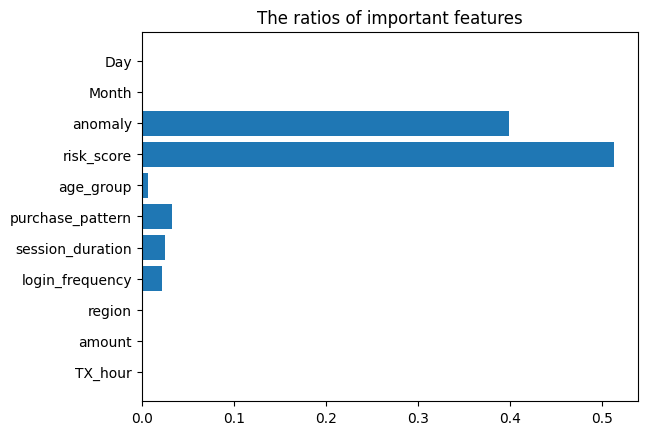

In [ ]:
# Factores impact the anomaly
plt.barh(X_train.columns, model.feature_importances_)
plt.title("The ratios of important features")

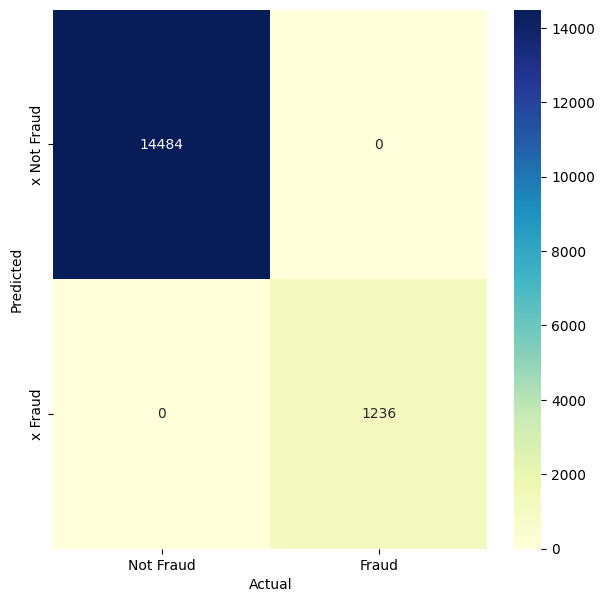

In [ ]:
# Confusion matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data,
    columns= np.array(["Not Fraud", "Fraud"]),
    index= np.array(["x Not Fraud", "x Fraud"]),
)

df_cm.index.name = "Predicted"
df_cm.columns.name = "Actual"
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g");

### 2/ Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create models
model = DecisionTreeClassifier()

# build and train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)
print("Interept model")
print("--"*50)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("--"*50)
# print("F1 score:", f1_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Interept model
----------------------------------------------------------------------------------------------------
Accuracy score: 1.0
----------------------------------------------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14469
           1       1.00      1.00      1.00      1251

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



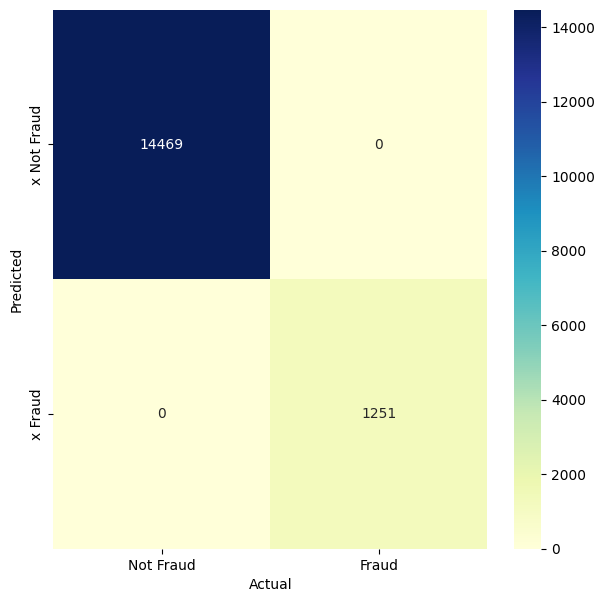

In [ ]:
# Confusion matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data,
    columns= np.array(["Not Fraud", "Fraud"]),
    index= np.array(["x Not Fraud", "x Fraud"]),
)

df_cm.index.name = "Predicted"
df_cm.columns.name = "Actual"
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g");

## 3/ Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale datasets
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Build and train model
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performance on model
print("Train Datasets")
print(classification_report(y_train, y_train_pred))
print("--"*30)
print("Test Datasets")
print(classification_report(y_test, y_test_pred))

Train Datasets
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57636
           1       1.00      1.00      1.00      5244

    accuracy                           1.00     62880
   macro avg       1.00      1.00      1.00     62880
weighted avg       1.00      1.00      1.00     62880

------------------------------------------------------------
Test Datasets
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14469
           1       1.00      1.00      1.00      1251

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



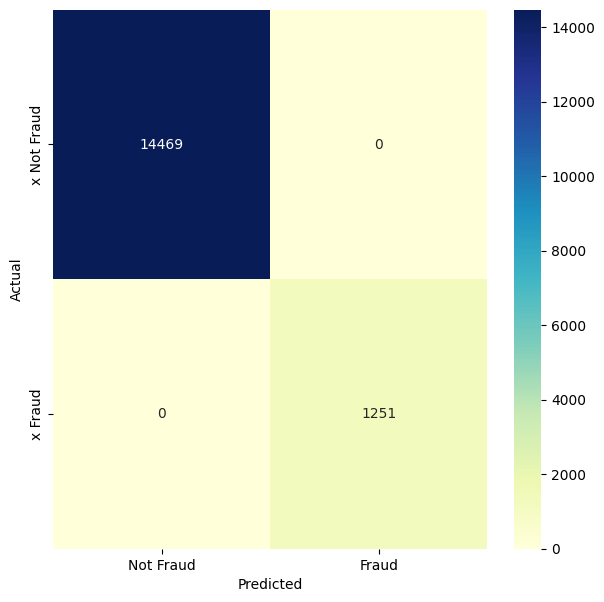

In [ ]:
# Confusion matrix
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(data,
    columns= np.array(["Not Fraud", "Fraud"]),
    index= np.array(["x Not Fraud", "x Fraud"]),
)

df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(7, 7))
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g");

## 4/ Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build and train model
model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Performance on model
print("Interept model")
print("--"*50)
print("Accuracy score:", accuracy_score(y_test, y_test_pred))
print("--"*50)
print("Train Datasets")
print(classification_report(y_train, y_train_pred))
print("--"*30)
print("Test Datasets")
print(classification_report(y_test, y_test_pred))

Interept model
----------------------------------------------------------------------------------------------------
Accuracy score: 1.0
----------------------------------------------------------------------------------------------------
Train Datasets
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57621
           1       1.00      1.00      1.00      5259

    accuracy                           1.00     62880
   macro avg       1.00      1.00      1.00     62880
weighted avg       1.00      1.00      1.00     62880

------------------------------------------------------------
Test Datasets
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14484
           1       1.00      1.00      1.00      1236

    accuracy                           1.00     15720
   macro avg       1.00      1.00      1.00     15720
weighted avg       1.00      1.00      1.00     15720



## 5/ Model Explanation

The models provide high accuracy predictions because transactions exhibit specific behaviors from "Fraud Detection" such as:


*   Primarily belonging to high-risk groups.
*   Low login frequencies ranging from 1 to 2 times.
*   Predominantly involving new users.
*   Trading sessions lasting for a short duration of approximately 0.5 hours, whereas typical trading sessions may extend up to 3 hours.

# VI. Conclusion


*   Overall, analysis metaverse financial transaction gain insight behavioral users on virtual environment.

*   Build model prediction with high-performance to detect anomaly transactions, helping organizations prevent Money Laundering Money.
identifying potential risks or ensuring that transactions adhere to regulations.

*   Analyze transaction patterns to link addresses based on common ownership or repeated transactions through model clustering and GEPHI visualization.

*   Based on the address clustering model, 2 organizations associated with unusual behavior were detected and showed signs of money laundering. From there, consideration can be given to temporarily suspending transactions and investigating related parties more specifically.











